In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
%matplotlib inline
import pandas as pd

In [2]:
cmap = ["#440154ff", "#440558ff", "#450a5cff", "#450e60ff", "#451465ff", "#461969ff",
 "#461d6dff", "#462372ff", "#472775ff", "#472c7aff", "#46307cff", "#45337dff",
 "#433880ff", "#423c81ff", "#404184ff", "#3f4686ff", "#3d4a88ff", "#3c4f8aff", 
 "#3b518bff", "#39558bff", "#37598cff", "#365c8cff", "#34608cff", "#33638dff",
 "#31678dff", "#2f6b8dff", "#2d6e8eff", "#2c718eff", "#2b748eff", "#29788eff",
 "#287c8eff", "#277f8eff", "#25848dff", "#24878dff", "#238b8dff", "#218f8dff",
 "#21918dff", "#22958bff", "#23988aff", "#239b89ff", "#249f87ff", "#25a186ff",
 "#25a584ff", "#26a883ff", "#27ab82ff", "#29ae80ff", "#2eb17dff", "#35b479ff",
 "#3cb875ff", "#42bb72ff", "#49be6eff", "#4ec16bff", "#55c467ff", "#5cc863ff",
 "#61c960ff", "#6bcc5aff", "#72ce55ff", "#7cd04fff", "#85d349ff", "#8dd544ff",
 "#97d73eff", "#9ed93aff", "#a8db34ff", "#b0dd31ff", "#b8de30ff", "#c3df2eff",
 "#cbe02dff", "#d6e22bff", "#e1e329ff", "#eae428ff", "#f5e626ff", "#fde725ff"]

In [3]:
fontlabelsize = 24
ticklabelsize = 20


In [29]:
qpc_dir = '/home/nefta/thesis/results/qpc/supercurrent/decay20/'
qpc_filedirs = sorted(list(os.walk(qpc_dir))[0][1])
vsg_values = sorted([float(element[4:-18]) for element in list(os.walk(qpc_dir))[0][1]])

qpc_dict = dict(zip(vsg_values, qpc_filedirs))

In [30]:
vsg_values

[-0.8, -0.7, -0.6, -0.4, -0.2, -0.15, -0.1, -0.05]

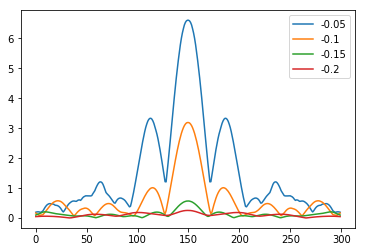

In [31]:
fig, ax = plt.subplots()
for vsg in list(reversed(vsg_values))[:4]:
    data = pd.read_csv(qpc_dir + qpc_dict[vsg] + '/data.csv', delimiter=' ', header=None)[0].values
    ax.plot(data, label=vsg)
    ax.legend()

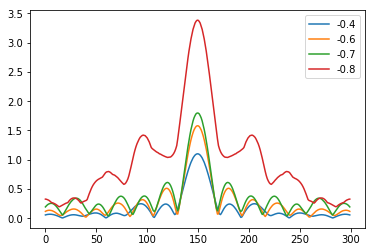

In [32]:
fig, ax = plt.subplots()
for vsg in list(reversed(vsg_values))[4:]:
    data = pd.read_csv(qpc_dir + qpc_dict[vsg] + '/data.csv', delimiter=' ', header=None)[0].values
    ax.plot(data, label=vsg)
    ax.legend()

In [26]:
qpc_edges_dir = '/home/nefta/thesis/results/qpc_both_edges/supercurrent/'
qpc_filedirs = sorted(list(os.walk(qpc_edges_dir))[0][1])[-7:]
vsg_values = [-0.1, -0.15, -0.2, -0.4, -0.6, -0.7, -0.8]

qpc_dict = dict(zip(vsg_values, qpc_filedirs))

In [27]:
qpc_dict

{-0.8: 'vsg=-0.8-20180314-12:34:14',
 -0.7: 'vsg=-0.7-20180314-12:24:15',
 -0.6: 'vsg=-0.6-20180314-12:14:25',
 -0.4: 'vsg=-0.4-20180314-12:04:38',
 -0.2: 'vsg=-0.2-20180314-11:54:43',
 -0.15: 'vsg=-0.15-20180314-11:44:50',
 -0.1: 'vsg=-0.1-20180314-11:34:58'}

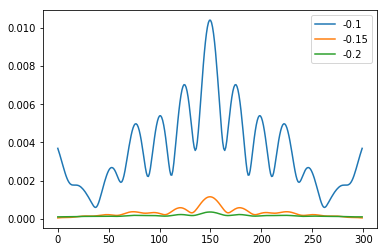

In [28]:
for vsg in [-0.1, -0.15, -0.2, ]:
    data = pd.read_csv(qpc_edges_dir + qpc_dict[vsg] + '/data.csv', delimiter=' ', header=None)[0].values
    plt.plot(data, label=vsg)
    
plt.legend()

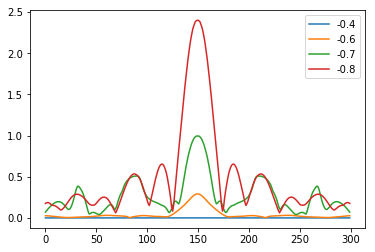

In [24]:
for vsg in [-0.4, -0.6, -0.7, -0.8]:
    data = pd.read_csv(qpc_edges_dir + qpc_dict[vsg] + '/data.csv', delimiter=' ', header=None)[0].values
    plt.plot(data, label=vsg)
plt.legend()

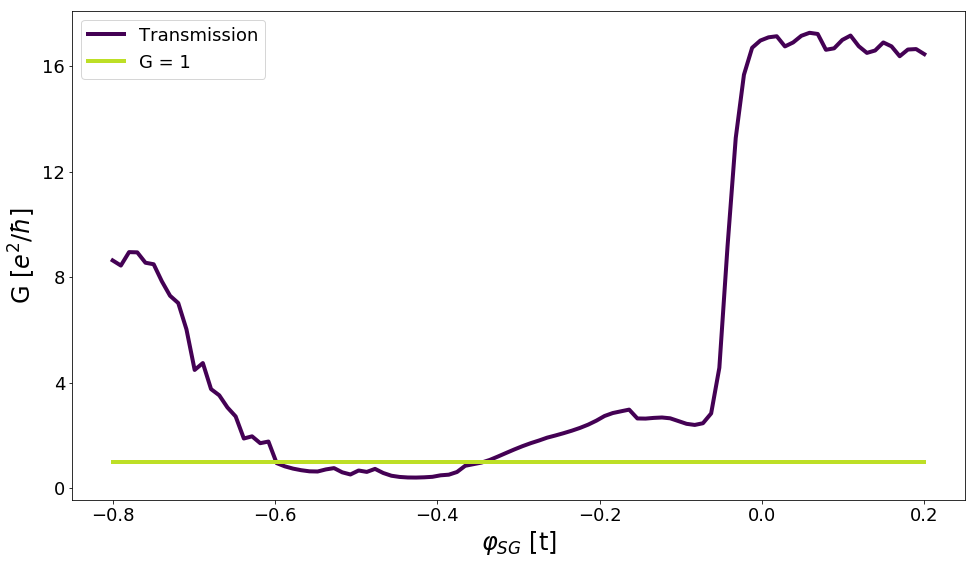

In [65]:
datafile = '/home/nefta/thesis/results/qpc/conductance/vbg=0.2-20180313-12:09:04/data.csv'
data = pd.read_csv(datafile, header=None, delimiter=' ')

import matplotlib as mpl
cmap = mpl.cm.viridis

ticklabelsize = 18
fontlabelsize = 24
fig, ax = plt.subplots(figsize=(16,9))
conductance_data = data.iloc[0].values
ax.plot(np.linspace(-0.8, 0.2, 100), conductance_data, color=cmap(0), linewidth=4, label='Transmission')
ax.plot(np.linspace(-0.8, 0.2, 100), np.ones(len(conductance_data)), color=cmap(230),  linewidth=4, label='G = 1')
#ax.xaxis.set_ticks(np.arange(-0.8, 0.3, 0.1))
ax.legend(prop={'size': 18})
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks(np.arange(0, 18, 2)[::2])
#ax.set_xlim([-0.8, 0.2])
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)
#fig.savefig('qpc-conductance.eps')

### Plotting bands

In [21]:
maindir = '/home/nefta/thesis/results/bands/qpc/'
band_files = sorted(list(os.walk(maindir))[0][1])

In [32]:
files_dict = dict(zip([-0.1, -0.2, -0.3, -0.4, -0.6, -0.8, 0.0, 0.1], band_files))

In [33]:
bindex = 564
def get_bands(vsg):
    data = pd.read_csv(maindir + files_dict[vsg] + '/data.csv', index_col=0)
    band1, band2 = data.iloc[bindex].values, data.iloc[bindex - 1].values
    return(band1, band2)

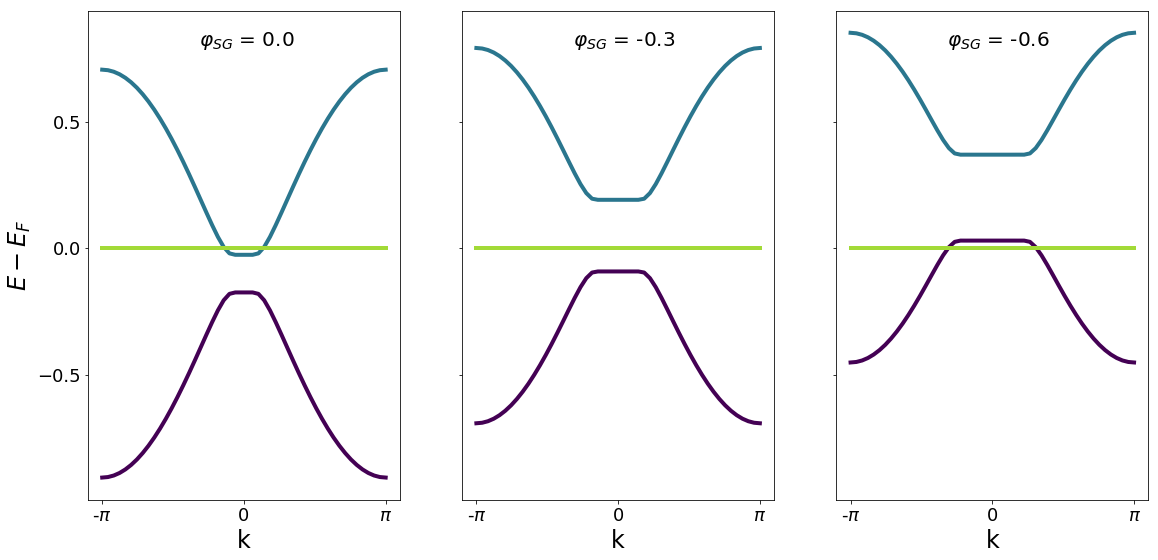

In [98]:
import matplotlib.patches as mpatches

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(19,9))
kvals = np.linspace(-np.pi, np.pi, 50)

for ax, vsg in zip((ax1, ax2, ax3), (0.0, -0.3, -0.6)):
    bands = get_bands(vsg)
    ax.plot(kvals, bands[0], linewidth=4, color=cmap(100))
    ax.plot(kvals, bands[1], linewidth=4, color=cmap(0))
    ax.plot(kvals, np.zeros(len(bands[0])), linewidth=4, color=cmap(220))
    ax.xaxis.set_tick_params(labelsize=ticklabelsize)
    ax.yaxis.set_tick_params(labelsize=ticklabelsize)
    ax.xaxis.set_ticks([-np.pi, 0, np.pi])
    ax.xaxis.set_ticklabels([r'-$\pi$', 0, r'$\pi$'])
    ax.yaxis.set_ticks([-0.5, 0, 0.5])
    ax.set_xlabel('k',  size=fontlabelsize)
    #ax.legend(handles = [mpatches.Patch(color=None,label=r'$\varphi_{{SG}}$ = {}'.format(vsg))], 
    #          loc=9, prop={'size': 18})
    ax.text(-1, 0.8, r'$\varphi_{{SG}}$ = {}'.format(vsg), {'size': 20})
ax1.set_ylabel(r'$E - E_F$', size=fontlabelsize)

### Plots for QPC conductance with armchair edges, but edges are rough

### Depth 20, 10 % of sites deleted

In [49]:
filedirs = ['/home/nefta/thesis/results/qpc/conductance/rough/depth20size04/vbg=0.1-20180210-20:18:41/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size04/vbg=0.15-20180210-20:31:07/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size04/vbg=0.2-20180210-20:43:41/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size04/vbg=0.25-20180210-20:56:36/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size04/vbg=0.3-20180210-21:09:47/']

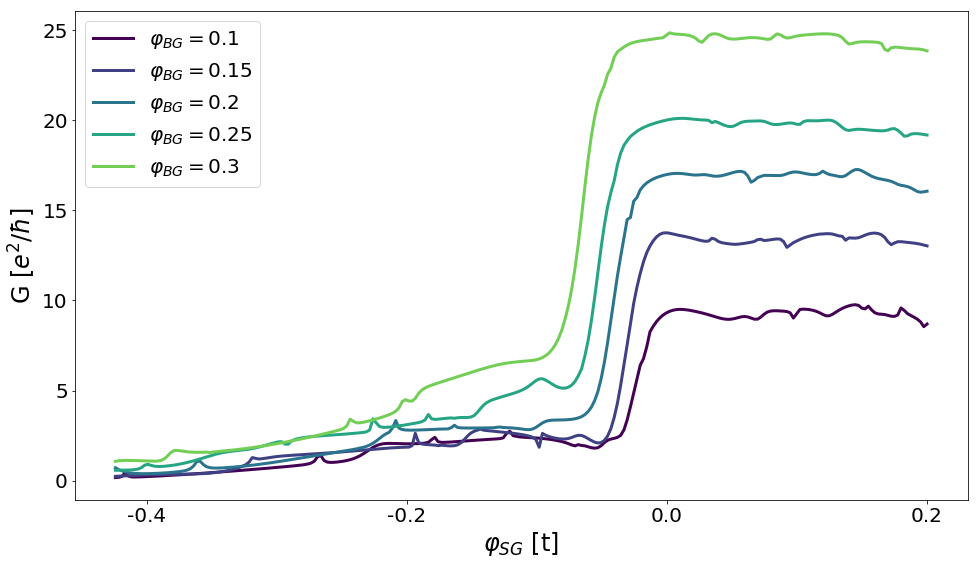

In [50]:
delta_cmap = round(len(cmap) / len(filedirs))

phi_sg = np.linspace(-0.8, 0.2, 400)[150:]
fig, ax = plt.subplots(figsize=(16, 9))
labels = [0.1, 0.15, 0.2, 0.25, 0.3]
#for filedir, plotlabel in zip(filedirs, labels):
for index, filedir in enumerate(filedirs):    
    plotlabel = labels[index]
    data = pd.read_csv(filedir + 'data.csv', 
                       header=None, delimiter=' ').values[0][150:]
    ax.plot(phi_sg, data, 
            label=r'$\varphi_{{BG}} = {}$'.format(plotlabel),
            color=cmap[index * delta_cmap], linewidth=3)
#ax.plot(phi_sg, 0*np.ones(len(phi_sg)),)
ax.legend(loc=2, prop={'size': ticklabelsize})
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)

ax.set_xticks([0.2, 0.0, -0.2, -0.4])
ax.set_xticklabels([0.2, 0.0, -0.2, -0.4], fontsize=ticklabelsize)
ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=ticklabelsize)

#fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc-conductance.eps')

### Depth 20, 30 % of sites deleted

In [47]:
filedirs = ['/home/nefta/thesis/results/qpc/conductance/rough/depth20size03/vbg=0.1-20180210-20:17:48/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size03/vbg=0.15-20180210-20:30:15/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size03/vbg=0.2-20180210-20:42:55/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size03/vbg=0.25-20180210-20:55:59/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size03/vbg=0.3-20180210-21:09:08/']

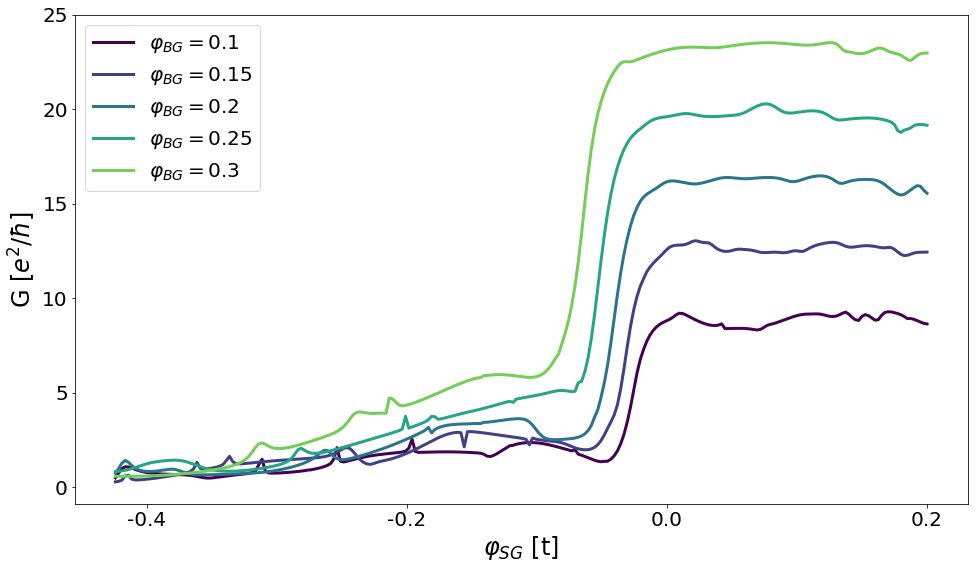

In [48]:
delta_cmap = round(len(cmap) / len(filedirs))

phi_sg = np.linspace(-0.8, 0.2, 400)[150:]
fig, ax = plt.subplots(figsize=(16, 9))
labels = [0.1, 0.15, 0.2, 0.25, 0.3]
#for filedir, plotlabel in zip(filedirs, labels):
for index, filedir in enumerate(filedirs):    
    plotlabel = labels[index]
    data = pd.read_csv(filedir + 'data.csv', 
                       header=None, delimiter=' ').values[0][150:]
    ax.plot(phi_sg, data, 
            label=r'$\varphi_{{BG}} = {}$'.format(plotlabel),
            color=cmap[index * delta_cmap], linewidth=3)
#ax.plot(phi_sg, 0*np.ones(len(phi_sg)),)
ax.legend(loc=2, prop={'size': ticklabelsize})
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)

ax.set_xticks([0.2, 0.0, -0.2, -0.4])
ax.set_xticklabels([0.2, 0.0, -0.2, -0.4], fontsize=ticklabelsize)
ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=ticklabelsize)

#fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc-conductance.eps')

### Depth 20, 20 % of sites deleted

In [45]:
filedirs = ['/home/nefta/thesis/results/qpc/conductance/rough/depth20size02/vbg=0.1-20180210-20:16:46/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size02/vbg=0.15-20180210-20:28:40/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size02/vbg=0.2-20180210-20:40:41/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size02/vbg=0.25-20180210-20:53:13/',
           '/home/nefta/thesis/results/qpc/conductance/rough/depth20size02/vbg=0.3-20180210-21:05:56/']

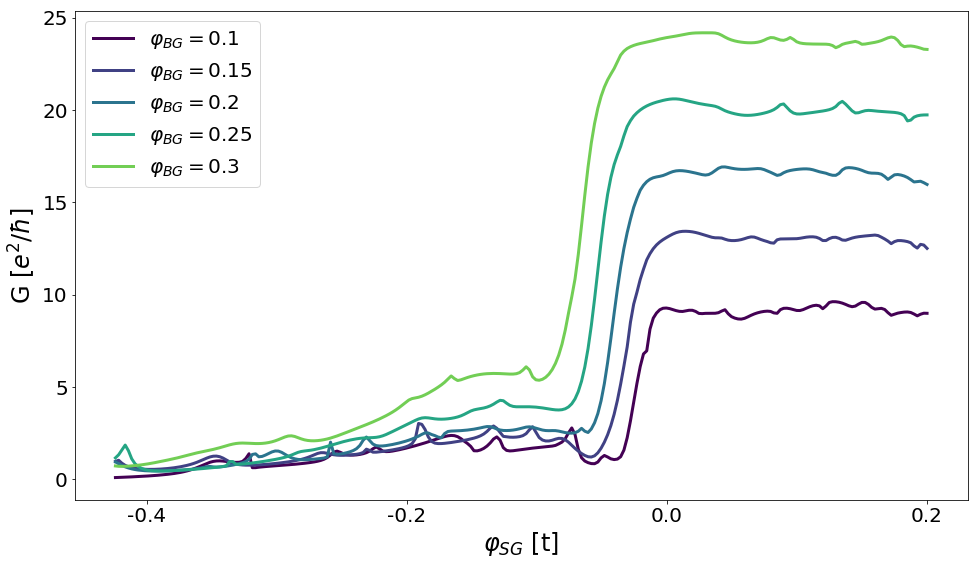

In [46]:
delta_cmap = round(len(cmap) / len(filedirs))

phi_sg = np.linspace(-0.8, 0.2, 400)[150:]
fig, ax = plt.subplots(figsize=(16, 9))
labels = [0.1, 0.15, 0.2, 0.25, 0.3]
#for filedir, plotlabel in zip(filedirs, labels):
for index, filedir in enumerate(filedirs):    
    plotlabel = labels[index]
    data = pd.read_csv(filedir + 'data.csv', 
                       header=None, delimiter=' ').values[0][150:]
    ax.plot(phi_sg, data, 
            label=r'$\varphi_{{BG}} = {}$'.format(plotlabel),
            color=cmap[index * delta_cmap], linewidth=3)
#ax.plot(phi_sg, 0*np.ones(len(phi_sg)),)
ax.legend(loc=2, prop={'size': ticklabelsize})
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)

ax.set_xticks([0.2, 0.0, -0.2, -0.4])
ax.set_xticklabels([0.2, 0.0, -0.2, -0.4], fontsize=ticklabelsize)
ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=ticklabelsize)

#fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc-conductance.eps')

### Depth 20, 50 % of sites deleted

In [42]:
filedirs = [ '/home/nefta/thesis/results/qpc/conductance/rough/depth20size05/vbg=0.1-20180210-20:14:55/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size05/vbg=0.15-20180210-20:24:28/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size05/vbg=0.2-20180210-20:34:11/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size05/vbg=0.25-20180210-20:44:10/',
            '/home/nefta/thesis/results/qpc/conductance/rough/depth20size05/vbg=0.3-20180210-20:54:34/'
]

In [43]:
delta_cmap = round(len(cmap) / len(filedirs))

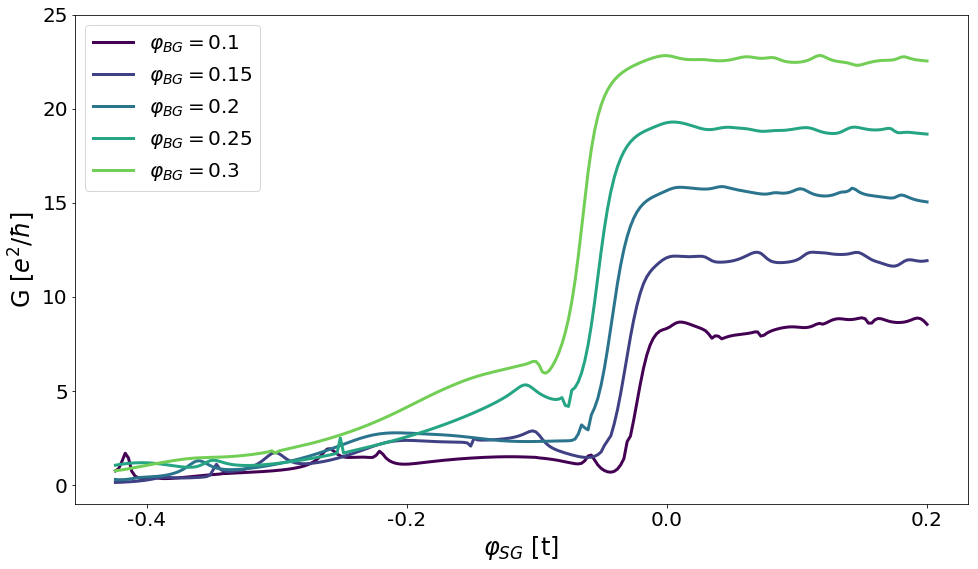

In [44]:
phi_sg = np.linspace(-0.8, 0.2, 400)[150:]
fig, ax = plt.subplots(figsize=(16, 9))
labels = [0.1, 0.15, 0.2, 0.25, 0.3]
#for filedir, plotlabel in zip(filedirs, labels):
for index, filedir in enumerate(filedirs):    
    plotlabel = labels[index]
    data = pd.read_csv(filedir + 'data.csv', 
                       header=None, delimiter=' ').values[0][150:]
    ax.plot(phi_sg, data, 
            label=r'$\varphi_{{BG}} = {}$'.format(plotlabel),
            color=cmap[index * delta_cmap], linewidth=3)
#ax.plot(phi_sg, 0*np.ones(len(phi_sg)),)
ax.legend(loc=2, prop={'size': ticklabelsize})
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)

ax.set_xticks([0.2, 0.0, -0.2, -0.4])
ax.set_xticklabels([0.2, 0.0, -0.2, -0.4], fontsize=ticklabelsize)
ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=ticklabelsize)

#fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc-conductance.eps')

### Plots for QPC conductance with armchair edges

In [3]:
filedirs = ['/home/nefta/thesis/results/qpc/conductance/vbg=0.1-20180210-18:19:55/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.15-20180210-18:31:54/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.2-20180210-18:44:06/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.25-20180210-18:56:31/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.3-20180210-19:09:12/']

In [26]:
delta_cmap = round(len(cmap) / len(filedirs))

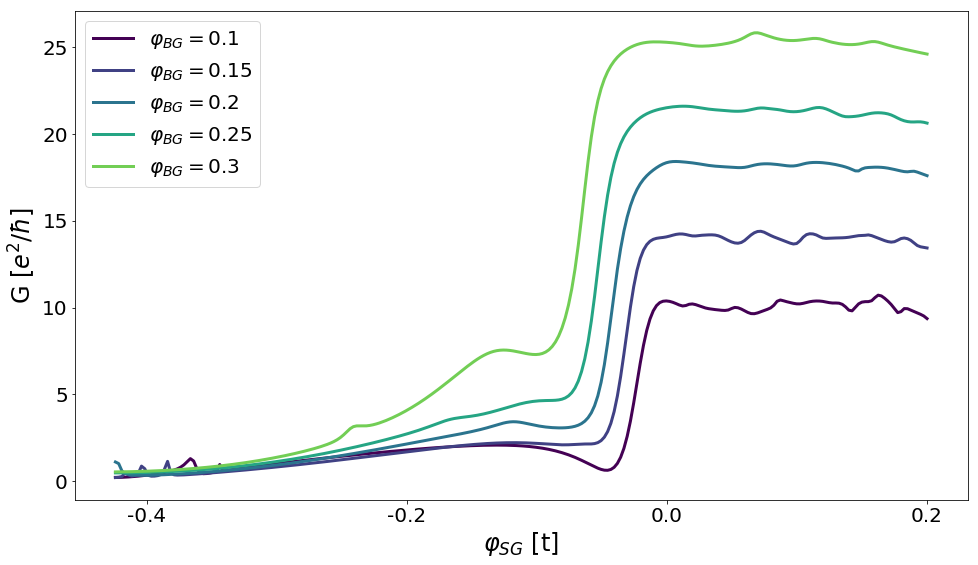

In [41]:
phi_sg = np.linspace(-0.8, 0.2, 400)[150:]
fig, ax = plt.subplots(figsize=(16, 9))
labels = [0.1, 0.15, 0.2, 0.25, 0.3]
#for filedir, plotlabel in zip(filedirs, labels):
for index, filedir in enumerate(filedirs):    
    plotlabel = labels[index]
    data = pd.read_csv(filedir + 'data.csv', 
                       header=None, delimiter=' ').values[0][150:]
    ax.plot(phi_sg, data, 
            label=r'$\varphi_{{BG}} = {}$'.format(plotlabel),
            color=cmap[index * delta_cmap], linewidth=3)
#ax.plot(phi_sg, 0*np.ones(len(phi_sg)),)
ax.legend(loc=2, prop={'size': ticklabelsize})
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)

ax.set_xticks([0.2, 0.0, -0.2, -0.4])
ax.set_xticklabels([0.2, 0.0, -0.2, -0.4], fontsize=ticklabelsize)
ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=ticklabelsize)

#fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc-conductance.eps')

In [6]:
data = pd.read_csv(filedirs[0] + 'data.csv', header=None, delimiter=' ').values

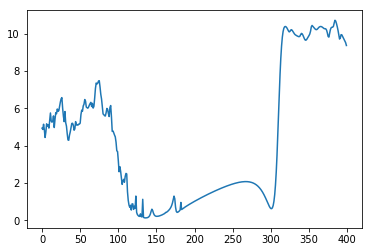

In [11]:
plt.plot(data[0])

## QPC heatmap

In [5]:
header_bfield = ['b{}'.format(index) for index in range(500)]

In [35]:
data1 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:13:52/data.csv',
           names=header_bfield, delimiter=' ')
data2 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:15:18/data.csv',
                   names=header_bfield, delimiter=' ')
data3 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:16:13/data.csv',
                   names=header_bfield, delimiter=' ')
data4 = pd.read_csv( '/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:17:09/data.csv',
                   names=header_bfield, delimiter=' ')
data5 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180221-11:08:53/data.csv',
                   names=header_bfield, delimiter=' ')
data6 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180221-11:48:08/data.csv',
                   names=header_bfield, delimiter=' ')

In [38]:
data2.set_index(np.arange(25, 50), inplace=True)
data3.set_index(np.arange(50, 75), inplace=True)
data4.set_index(np.arange(75, 100), inplace=True)
data5.set_index(np.arange(100, 125), inplace=True)
data6.set_index(np.arange(125, 150), inplace=True)

In [39]:
data = pd.concat([data1, data2, data3, data4, data5, data6])

In [40]:
data.drop(25, inplace=True)
data.drop(50, inplace=True)
data.drop(75, inplace=True)
data.drop(100, inplace=True)
data.drop(125, inplace=True)

In [41]:
icnorm = [data.ix[index].values / max(data.ix[index]) for index in data.index.values]


/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [42]:
maxB = 9e-05
bvalues = np.linspace(-maxB, maxB, 500)
phi_sg = np.linspace(0.0, -0.05, 97)
fluxvalues = bvalues * 700 * 210

In [43]:
deltaf = fluxvalues[1] - fluxvalues[0]
deltaphi = phi_sg[1] - phi_sg[0]

In [44]:
phi_sg[0], phi_sg[21], phi_sg[40], phi_sg[58], phi_sg[78], phi_sg[-1]
#phiticks = [0, 21, 40, 58, 78, 96]

(0.0,
 -0.010937499999999999,
 -0.020833333333333332,
 -0.030208333333333334,
 -0.040625000000000001,
 -0.050000000000000003)

In [45]:
fluxvalues[249], fluxvalues[249-94], fluxvalues[249+95], fluxvalues[249-188],  fluxvalues[249+188]
#fluxticks = [249+188, 249+94, 249, 249-94, 249-188]

(-0.026513026052103952,
 -5.0109619238476952,
 5.010961923847697,
 -9.9954108216432864,
 9.9423847695390801)

"\nax.xaxis.set_ticks([61, 155, 249, 343, 437])\nax.xaxis.set_ticklabels([-10, -5, 0, 5, 10], fontsize=ticklabelsize)\nax.yaxis.set_ticks(phiticks)\nax.yaxis.set_ticklabels([0.0, -0.01, -0.02, -0.03, -0.04, -0.05], fontsize=ticklabelsize)\nfig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc_icnorm_heatmap.eps')\n"

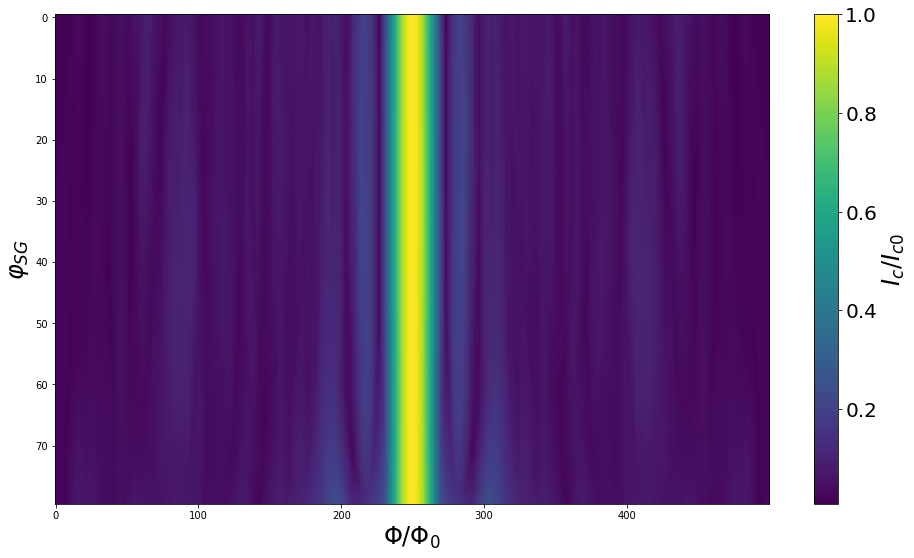

In [49]:
fontlabelsize = 24
ticklabelsize = 20
fig, ax = plt.subplots(figsize=(16, 9))
cax = ax.imshow(np.asarray(icnorm[:80]), interpolation='None', aspect='auto')
#cax = ax.imshow(np.asarray(data.values), interpolation='None', aspect='auto')
cbar = fig.colorbar(cax,)
cbar.ax.tick_params(labelsize=ticklabelsize)

cbar.set_label(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
#cbar.set_label(r'$I_c$', fontsize=fontlabelsize)
ax.set_xlabel(r'$\Phi / \Phi_0$',  fontsize=fontlabelsize)
ax.set_ylabel(r'$\varphi_{SG}$', fontsize=fontlabelsize)
"""
ax.xaxis.set_ticks([61, 155, 249, 343, 437])
ax.xaxis.set_ticklabels([-10, -5, 0, 5, 10], fontsize=ticklabelsize)
ax.yaxis.set_ticks(phiticks)
ax.yaxis.set_ticklabels([0.0, -0.01, -0.02, -0.03, -0.04, -0.05], fontsize=ticklabelsize)
fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc_icnorm_heatmap.eps')
"""

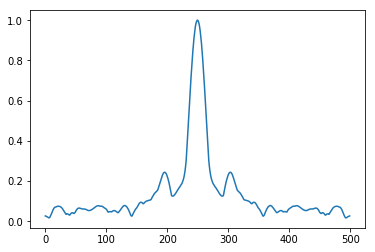

In [54]:
plt.plot(icnorm[80])

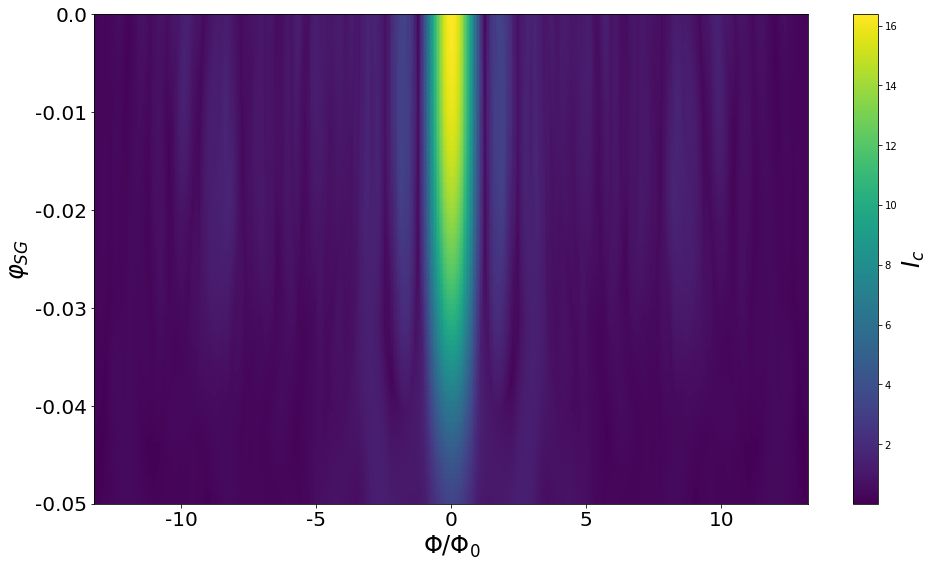

In [138]:
fontlabelsize = 24
ticklabelsize = 20
fig, ax = plt.subplots(figsize=(16, 9))
X, Y = np.meshgrid(fluxvalues, phi_sg)
cax = ax.pcolormesh(X, Y, data.values)
cbar = fig.colorbar(cax)
cbar.set_label(r'$I_c$', fontsize=fontlabelsize)
ax.set_xlabel(r'$\Phi / \Phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$\varphi_{SG}\cdot 10^{-2}$', fontsize=fontlabelsize)
ax.xaxis.set_ticks([-10, -5, 0, 5, 10])
ax.xaxis.set_ticklabels([-10, -5, 0, 5, 10], fontsize=ticklabelsize)
ax.yaxis.set_ticks([0.0, -0.01, -0.02, -0.03, -0.04, -0.05])
ax.yaxis.set_ticklabels([0.0, -0.01, -0.02, -0.03, -0.04, -0.05], fontsize=ticklabelsize)
#ax.yaxis.set_ticklabels([0, -2.5, -5], fontsize=ticklabelsize)
fig.savefig('/home/nefta/thesis/Masterthesis/figure/testheatmap.eps')

### Next Steps
* Conductance plots for QPC